In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import tree
import random
import math
from random import seed
from random import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

In [2]:
#Load the data
df_tra = pd.read_csv(r"C:\Users\Student\Desktop\Assignment 4\optdigits (1).tra", header=None)
df_tes = pd.read_csv(r"C:\Users\Student\Desktop\Assignment 4\optdigits (1).tes", header=None)

df_tra_6 = df_tra[df_tra[64]==6]
df_tra_9 = df_tra[df_tra[64]==9]

df_tes_6 = df_tes[df_tes[64]==6]
df_tes_9 = df_tes[df_tes[64]==9]

df_tra_data = df_tra_6.append(df_tra_9) 
df_tes_data = df_tes_6.append(df_tes_9)

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

In [5]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [6]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

In [7]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

In [8]:
m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1500

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

learning_rates = [0.0001, 0.0005, 0.005, 0.001, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5]
for learning_rate in learning_rates:
    (cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)
#     print("Optimal Parameters for learning rate ",learning_rate, "is: \n", params_optimal, "\n")
    
    y_pred = predict(X, params_optimal)
    score = float(sum(y_pred == y))/ float(len(y))
    print("Error: "+str(1 - score))

Initial Cost is: [[0.69312718]] 

Error: 0.050000000000000044
Error: 0.052000000000000046
Error: 0.04800000000000004
Error: 0.052000000000000046
Error: 0.04200000000000004
Error: 0.03400000000000003
Error: 0.030000000000000027
Error: 0.03400000000000003
Error: 0.03400000000000003
Error: 0.03400000000000003


In [9]:
#Question 2

In [10]:
#Fa
learning_rates = [0.0001, 0.0005, 0.005, 0.001, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5]
for learning_rate in learning_rates:
    (cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)
#     print("Optimal Parameters for learning rate ",learning_rate, "is: \n", params_optimal, "\n")
    
    y_pred = predict(X, params_optimal)
    score = float(sum(y_pred == y))/ float(len(y))
    error = 1-score
    
mean = df_tes_data.mean()
mean

0      0.000000
1      0.072022
2      3.404432
3     11.498615
4     10.418283
        ...    
60    14.121884
61    10.975069
62     3.290859
63     0.074792
64     7.495845
Length: 65, dtype: float64

In [11]:
#Fb
df = df_tes_data.describe().transpose()
df

,count,mean,std,min,25%,50%,75%,max
0,361.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,361.0,0.072022,0.333864,0.0,0.0,0.0,0.0,4.0
2,361.0,3.404432,3.831504,0.0,0.0,2.0,6.0,15.0
3,361.0,11.498615,3.752869,0.0,10.0,13.0,14.0,16.0
4,361.0,10.418283,4.599468,0.0,7.0,12.0,14.0,16.0
...,...,...,...,...,...,...,...,...
60,361.0,14.121884,3.144942,0.0,14.0,15.0,16.0,16.0
61,361.0,10.975069,4.783878,0.0,8.0,12.0,15.0,16.0
62,361.0,3.290859,3.950548,0.0,0.0,1.0,6.0,16.0
63,361.0,0.074792,0.431344,0.0,0.0,0.0,0.0,6.0


In [12]:
var = df_tes_data.var()
var

0      0.000000
1      0.111465
2     14.680425
3     14.084026
4     21.155109
        ...    
60     9.890659
61    22.885488
62    15.606833
63     0.186057
64     2.256233
Length: 65, dtype: float64

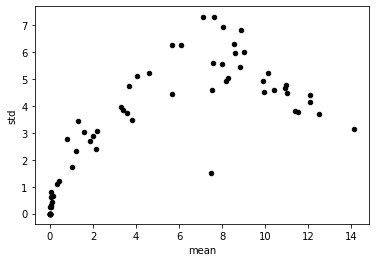

In [13]:
#Fc
import matplotlib.pyplot as plt
import pandas as pd

df.plot(kind='scatter',x='mean',y='std',color='black')
plt.show()